In [1]:
import sys, os
sys.path.append('/home/beams/USERBNP/scripts/bnpTools')
from bnpScan import bnpScan
import numpy as np

In [ ]:
userdir = '/mnt/micdata1/bnp/2022-1/OK'
logfile = 'log2.txt'   
A = bnpScan(userdir, logfile)
sampleName = 'Ecoli'
BDAin = -9058
# x_width = 80
# y_width = 120
# x_step = 2.5
# y_step = 2.5
# dw = 50

scans = [
    # width, height, step_w, step_h, dwell (ms), x, y, z
#      [60, 40, 0.5, 0.5, 25, 918, -1331+30, 296.167]
    ]

A.setupBatchXRFScans(sampleName, scans, BDAin, smp_angle = None)
A.startScan()

## Plot XRF data

In [4]:
sys.path.append('/home/beams/USERBNP/scripts/graceluo/bnp/APS2021c2/')
import h5py, os, collections, sys
from load_h5_bnp import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def loadscan():
    pv_angle = b'9idbTAU:SM:ST:ActPos'
    primary_dir = '/mnt/micdata1/bnp/2022-1/OK/'
    fdir = os.path.join(primary_dir,'img.dat')
    # # output_dir = os.path.join(primary_dir, 'output')
    img_tags = ['MAPS']
    #img_tags = ['MAPS', 'exchange_1', 'exchange_2', 'exchange_3', 'exchange_4']
    elms = [['Si', 'S', 'Ca', 'Zn', 'K', 'P', 'Fe', 'Cu', 'Cl', ]]
    smp_name = 'Ecoli'
    # img_def = ['XRF_roi', 'XRF_roi_plus', 'XRF_fits', 'XRF_fits/ds_ic']
    bnp_loadh5 = {}
    bnp_data = {}

    for img_tag, tag_elm in zip(img_tags, elms):
         # Create a load_h5_bnp class object
        bnp_d = load_h5_bnp(smp_name, fdir, img_tag, pv_angle, tag_elm)
         # Perform load action
        bnp_d.load_h5(padding=True, printch=False)
        bnp_data[img_tag] = bnp_d.data_pd
    return bnp_data

In [51]:
bnp_data = loadscan()
bnp_dataf = bnp_data['MAPS']

before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0001.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0002.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0032.mda.h5
No b'9idbTAU:SM:ST:ActPos' pv found in scan /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0032.old.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0032.old.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0033.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0034.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0035.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0036.mda.h5
before tag condition,

Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0102.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0103.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0104.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0105.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_fly0106.mda.h5
before tag condition, the current tag is:MAPS
Loading /mnt/micdata1/bnp/2022-1/OK/img.dat/bnp_step0001.mda.h5


In [46]:
sc = np.arange(96, 106, 1).tolist()

In [47]:
scan_num = ['bnp_fly%s.mda'%str(a).zfill(4) for a in sc]

step size: 0.08, area: 8 x 8 (um2)


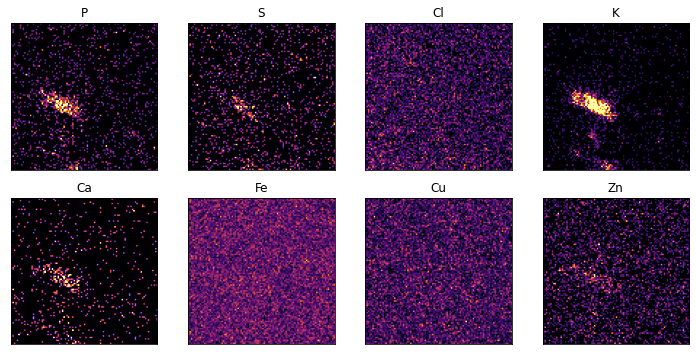

In [50]:
for s in ['bnp_fly0087.mda']:
    sel = bnp_dataf[bnp_dataf['scan_num'] == s]
    elms = ['P', 'S', 'Cl', 'K', 'Ca', 'Fe', 'Cu', 'Zn']
    fig, ax = plt.subplots(2, 4, figsize = (10,5))
    for e, ax_ in zip(elms, ax.ravel()):
        d = sel[e].values[0]
        ax_.imshow(d, cmap = 'inferno', vmax = np.mean(d) + 5 * np.std(d))
        ax_.set_title(e)
        ax_.set_xticks([])
        ax_.set_yticks([])
        xrange = abs(sel['xval'].values[0][0] - sel['xval'].values[0][-1])
        yrange = abs(sel['yval'].values[0][0] - sel['yval'].values[0][-1])
        sstep = abs(np.mean(np.diff(sel['xval'].values[0])))
    print('step size: %.2f, area: %d x %d (um2)'%(sstep, xrange, yrange ))
    plt.tight_layout()
    plt.savefig('/mnt/micdata1/bnp/2022-1/OK/XRFplots/%s_ss%.2f_area_%dx%d.png'%(s, sstep, xrange, yrange))

In [28]:
abs(np.mean(np.diff(sel['xval'].values[0])))

0.08

In [30]:
abs(sel['xval'].values[0][0] - sel['xval'].values[0][-1])

4.0